# Trace metadata width visualization

In [1]:
import numpy as np
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os

from utils.db_utils import get_db_absolute_path

In [2]:
database = get_db_absolute_path("main.db")
con2 = lite.connect(database)
query = "select * from trace_metadata_width;"
full_data = pd.read_sql_query(query, con2)
con2.close()

full_data.fillna("None",inplace=True)
full_data

id test_dataset_id training_dataset_id environment_id distance  \
0             1            None                 1.0           None     None   
1             2            None                 1.0           None     None   
2             3            None                 1.0           None     None   
3             4            None                 1.0           None     None   
4             5            None                 1.0           None     None   
...         ...             ...                 ...            ...      ...   
437126  1237127             2.0                None            1.0     10.0   
437127  1237128             2.0                None            1.0     10.0   
437128  1237129             2.0                None            1.0     10.0   
437129  1237130             2.0                None            1.0     10.0   
437130  1237131             2.0                None            1.0     10.0   

       device additive_noise_method_id  trace_process_id  trace_index  \
0         1.0                     None                 1            0   
1         1.0                     None                 1            1   
2         1.0                     None                 1            2   
3         1.0                     None                 1            3   
4         1.0                     None                 1            4   
...       ...                      ...               ...          ...   
437126   10.0                     None                 3         4994   
437127   10.0                     None                 3         4995   
437128   10.0                     None                 3         4996   
437129   10.0                     None                 3         4997   
437130   10.0                     None                 3         4998   

         max_val   min_val  mean_val   rms_val   std_val  
0       0.074767  0.025278  0.040720  0.042404  0.011831  
1       0.074491  0.025428  0.040724  0.042397  0.011794  
2       0.074857  0.025198  0.040693  0.042382  0.011845  
3       0.074725  0.025346  0.040684  0.042367  0.011823  
4       0.075115  0.025289  0.040627  0.042320  0.011849  
...          ...       ...       ...       ...       ...  
437126  1.000000  0.000000  0.453672  0.512417  0.238228  
437127  0.932627  0.017924  0.480705  0.520036  0.198394  
437128  0.923622  0.077919  0.517430  0.550360  0.187516  
437129  1.000000  0.146505  0.530383  0.558437  0.174773  
437130  1.000000  0.035889  0.489340  0.517580  0.168629  

[437131 rows x 14 columns]

In [3]:
def plot_trace_width__dyn_range(test_set, training_set, distance, device, trace_process_id):
    data = full_data.copy()
    #data.fillna("None",inplace=True)
    data = data[data["test_dataset_id"] == test_set]
    data = data[data["training_dataset_id"] == training_set]
    data = data[data["device"] == device]
    data = data[data["distance"] == distance]
    data = data[data["trace_process_id"] == trace_process_id]
    data["dyn_range"] = data["max_val"] - data["min_val"]
    mean_dynrange = np.mean(data["dyn_range"])
    plt.figure(figsize=(40,5))
    ax = plt.subplot(1,1,1)
    data.plot(x="trace_index", y="dyn_range", ax=ax)
    plt.ylim(mean_dynrange*0.9, mean_dynrange*1.2)
    plt.axhline(mean_dynrange, color="r")
    plt.title(f"Test_set: {test_set}, Training_set: {training_set}, Device: {device}, Distance: {distance}, Process_id: {trace_process_id}\nMean dyn-range: {round(mean_dynrange, 4)}")
    plt.show()

In [4]:
def plot_trace_width__rms(test_set, training_set, distance, device, trace_process_id):
    data = full_data.copy()
    #data.fillna("None",inplace=True)
    data = data[data["test_dataset_id"] == test_set]
    data = data[data["training_dataset_id"] == training_set]
    data = data[data["device"] == device]
    data = data[data["distance"] == distance]
    data = data[data["trace_process_id"] == trace_process_id]
    data["dyn_range"] = data["max_val"] - data["min_val"]
    
    mean_rms = np.sqrt(np.sum(data["rms_val"]**2)/(len(data["rms_val"])))
    mean_mean = np.mean(data["mean_val"])
    plt.figure(figsize=(40,5))
    ax = plt.subplot(1,1,1)
    data.plot(x="trace_index", y="rms_val", ax=ax, color="g")
    data.plot(x="trace_index", y="mean_val", ax=ax, color="r")
    plt.axhline(mean_mean, color="b")
    plt.axhline(mean_rms, color="b")
    #plt.ylim(mean_rms*0.0, mean_rms*1.2)
    plt.title(f"Test_set: {test_set}, Training_set: {training_set}, Device: {device}, Distance: {distance}, Process_id: {trace_process_id}\nMean rms: {round(mean_rms, 4)}")
    plt.show()

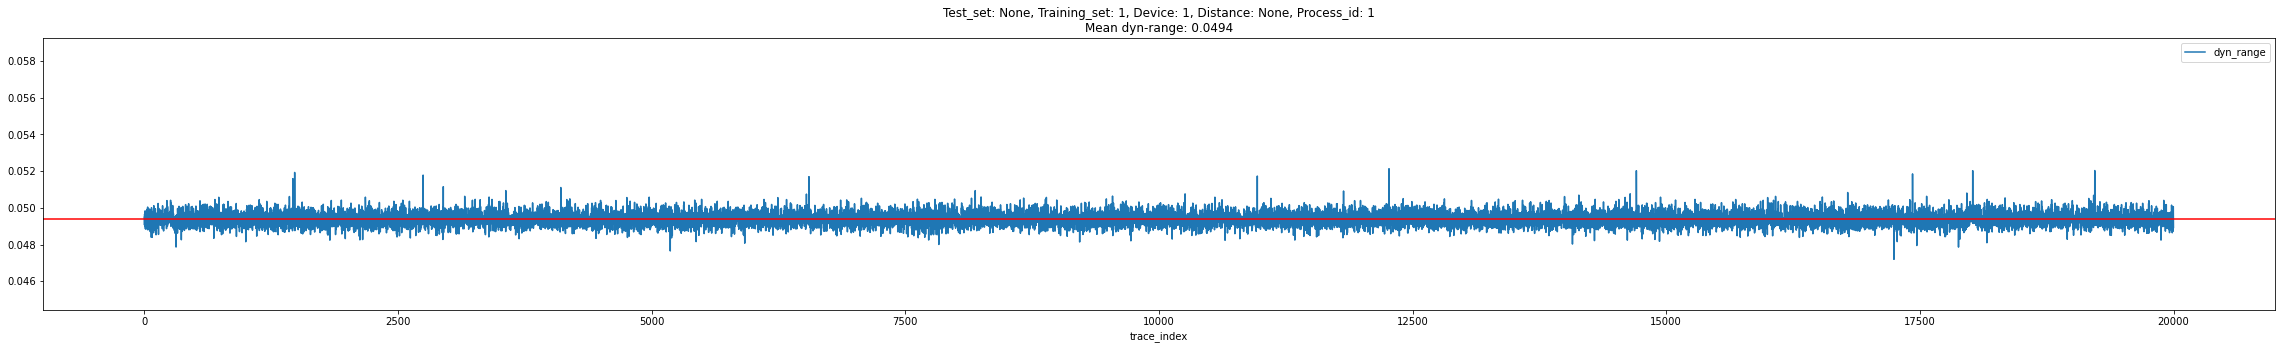

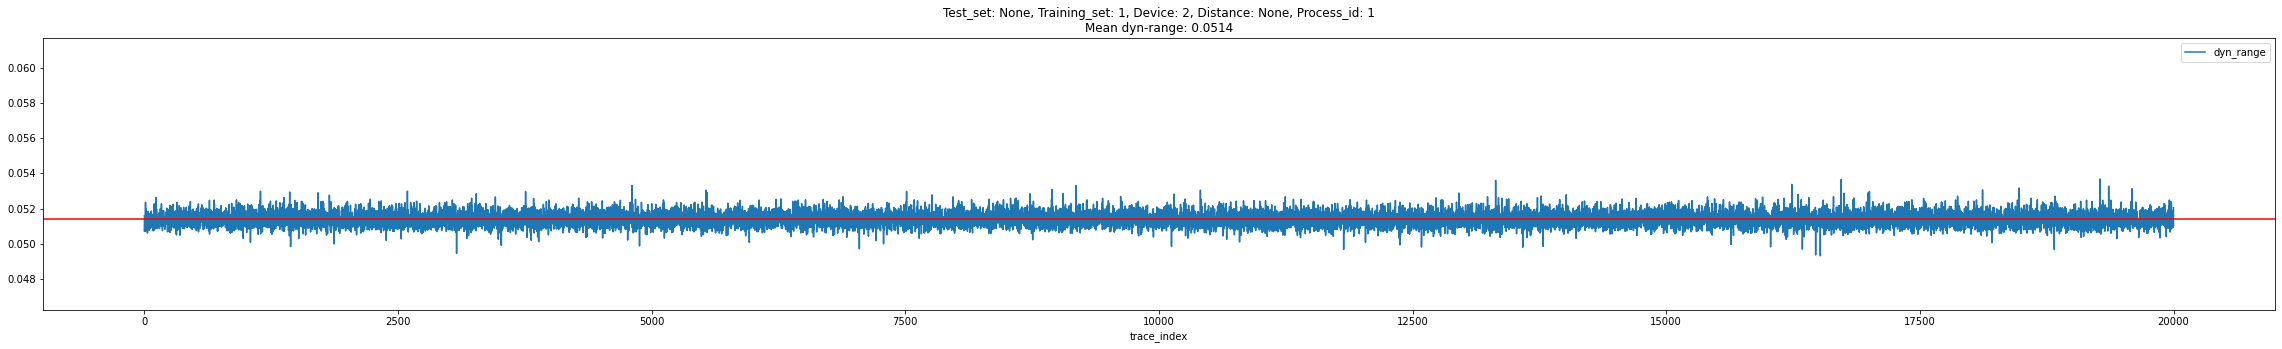

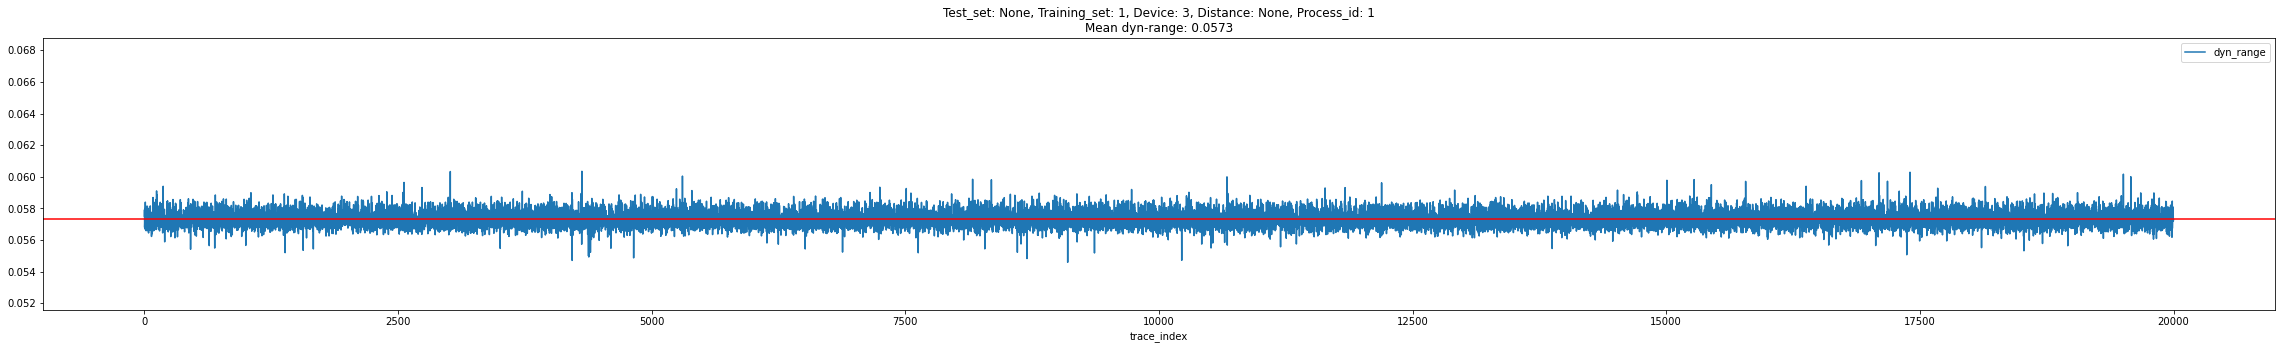

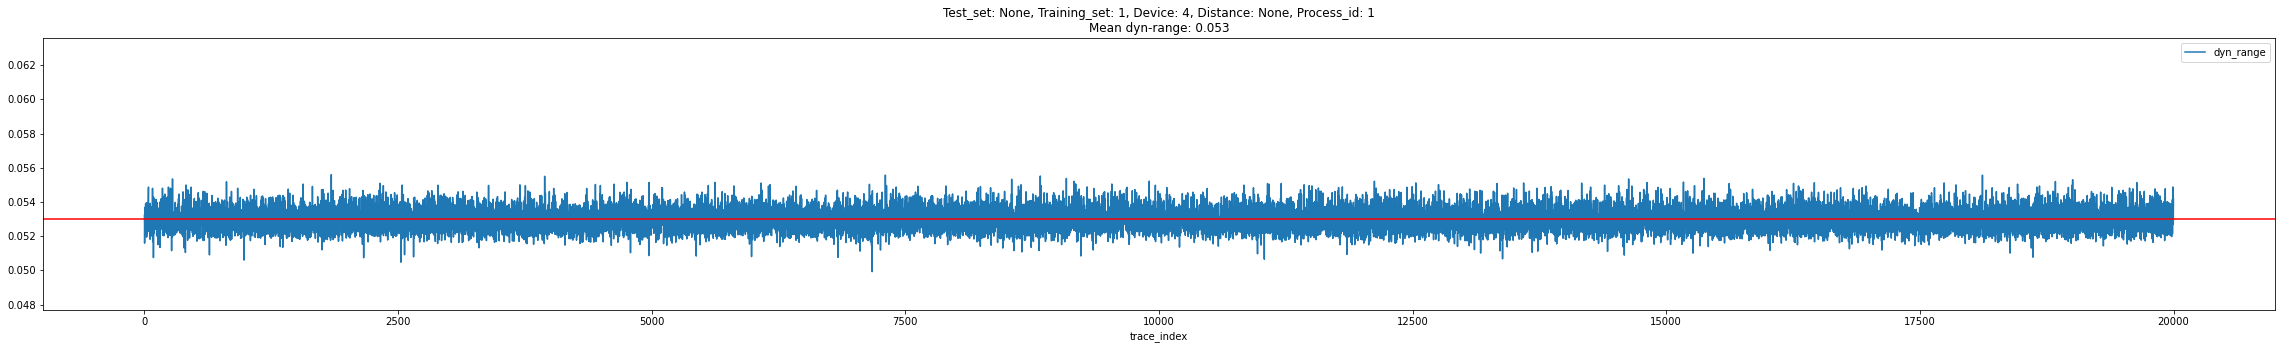

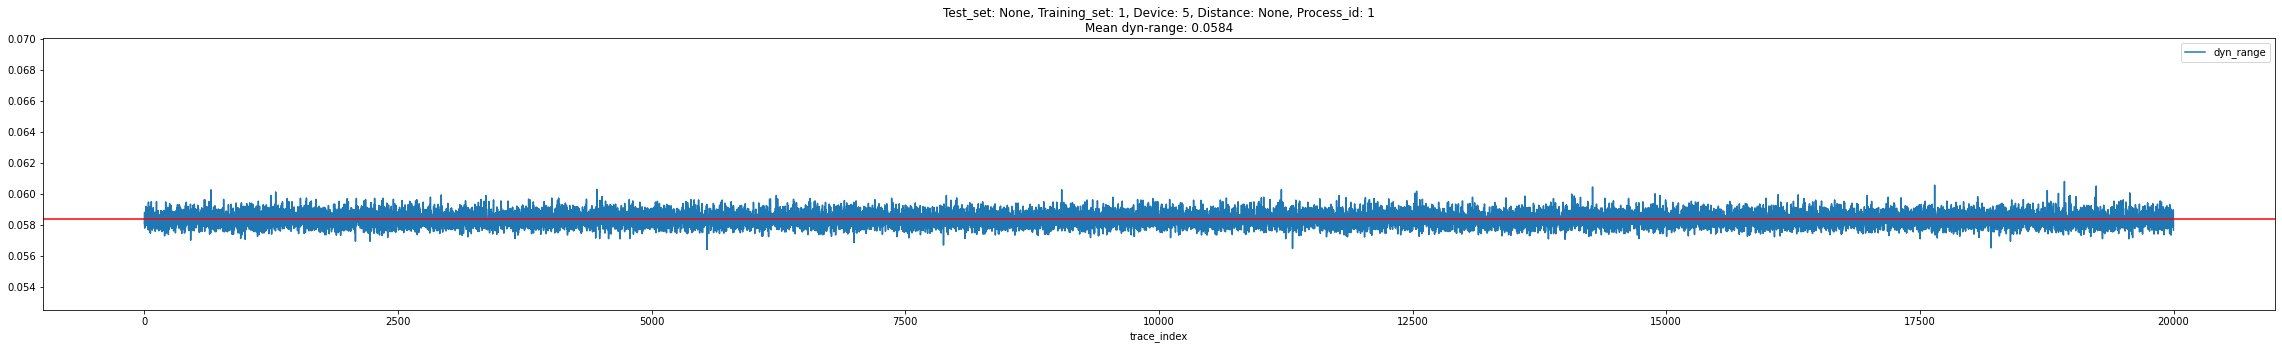

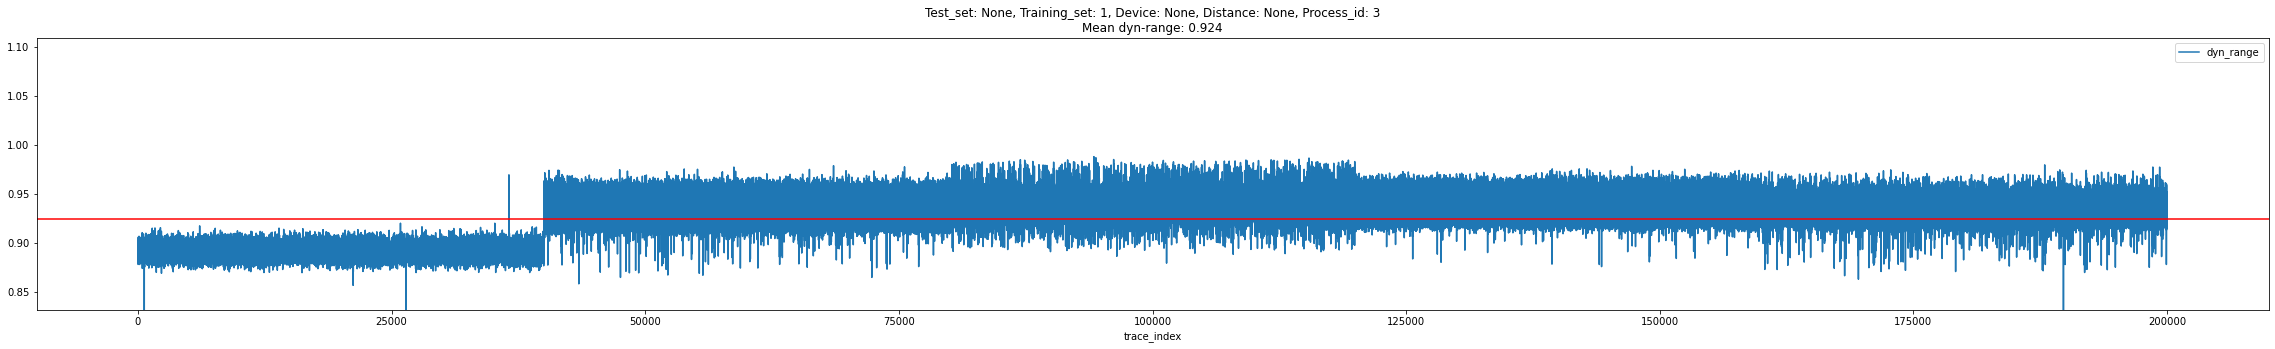

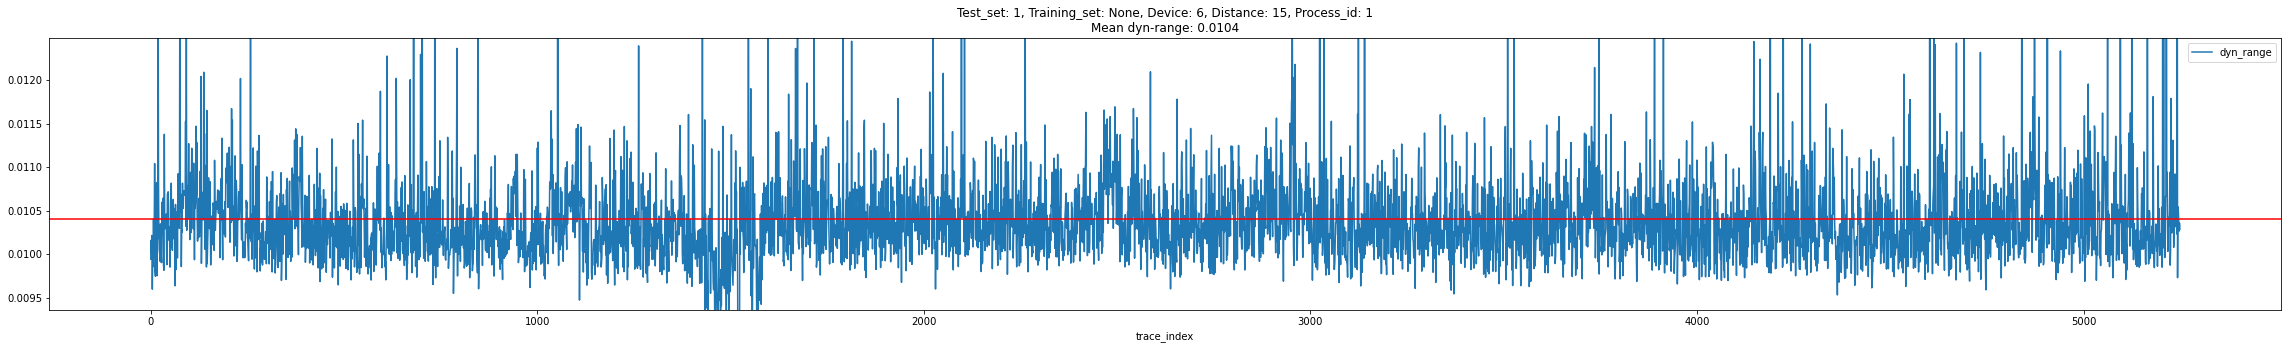

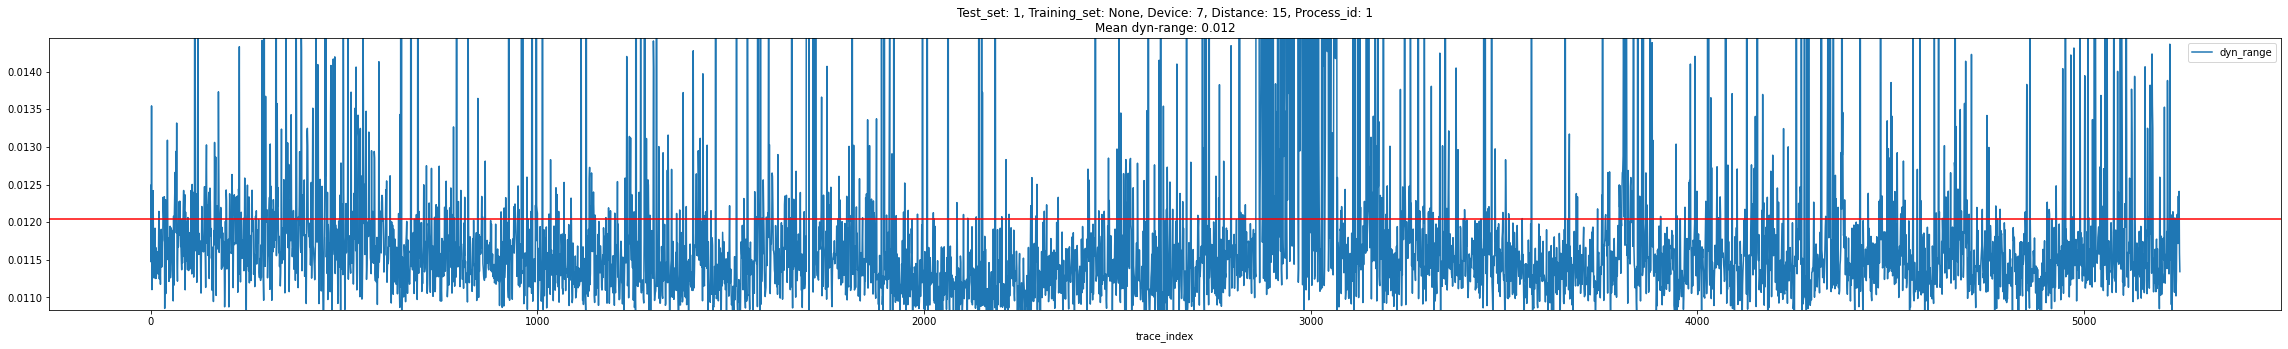

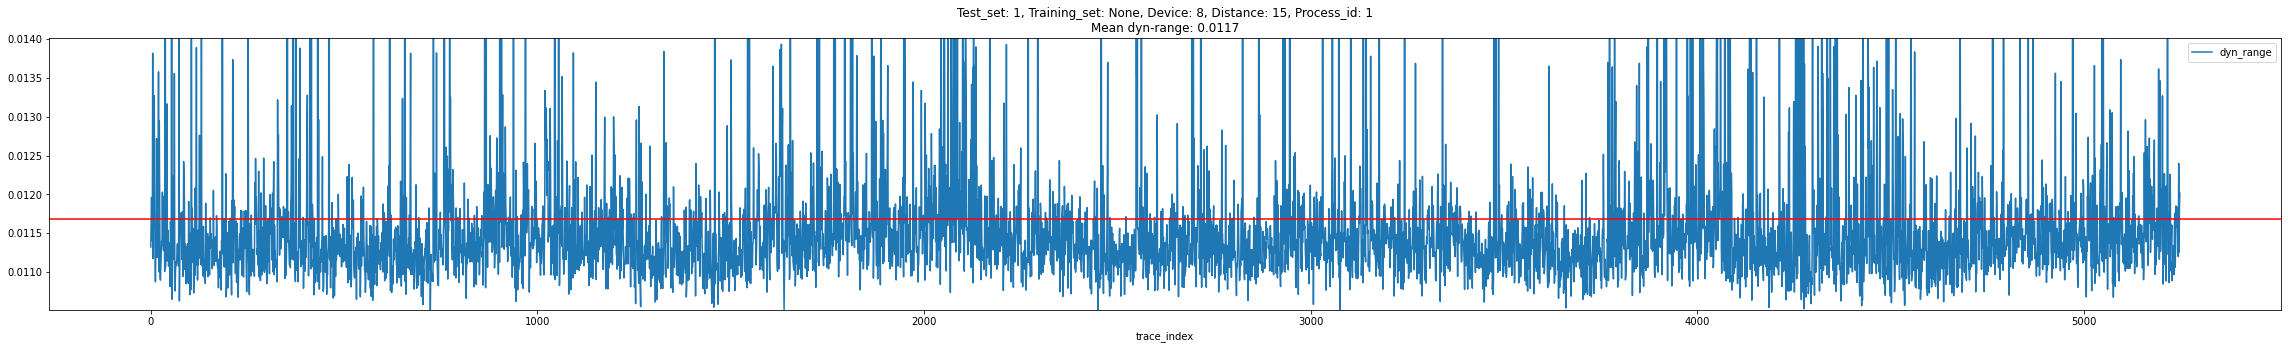

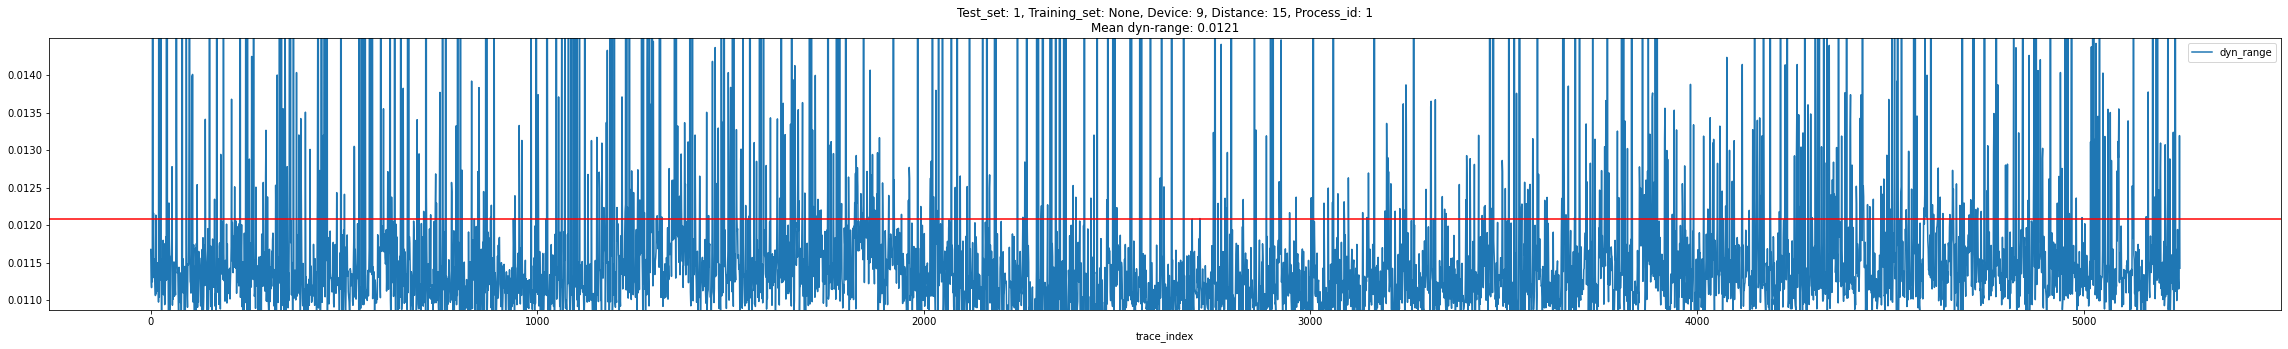

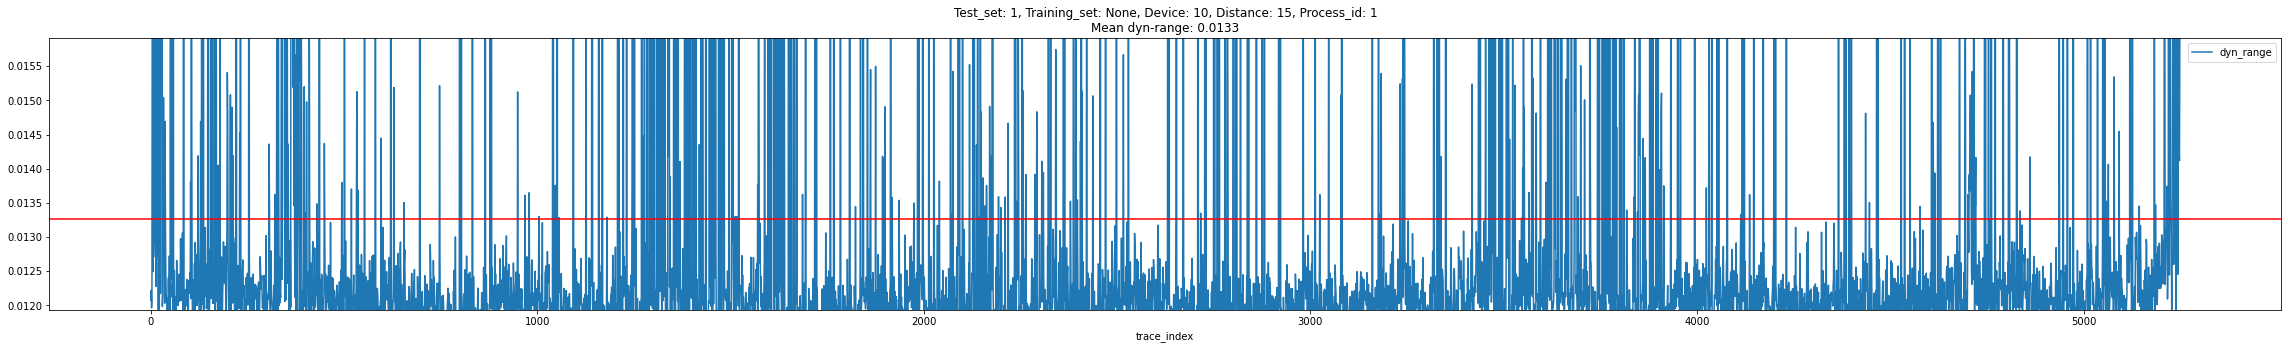

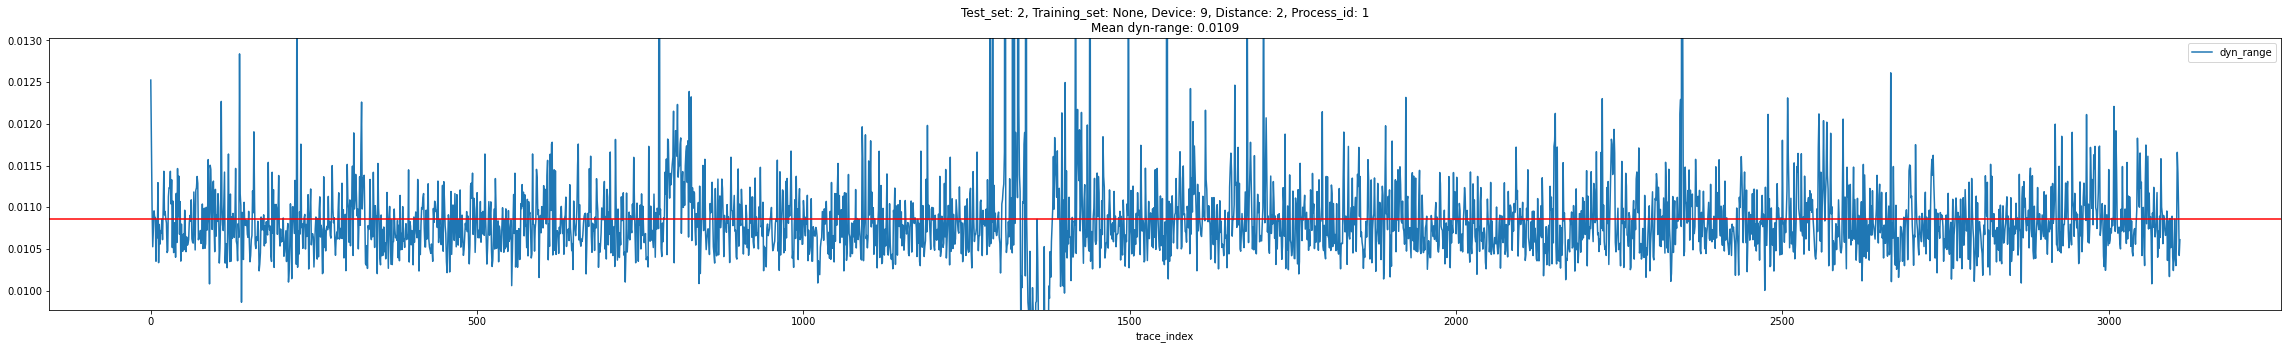

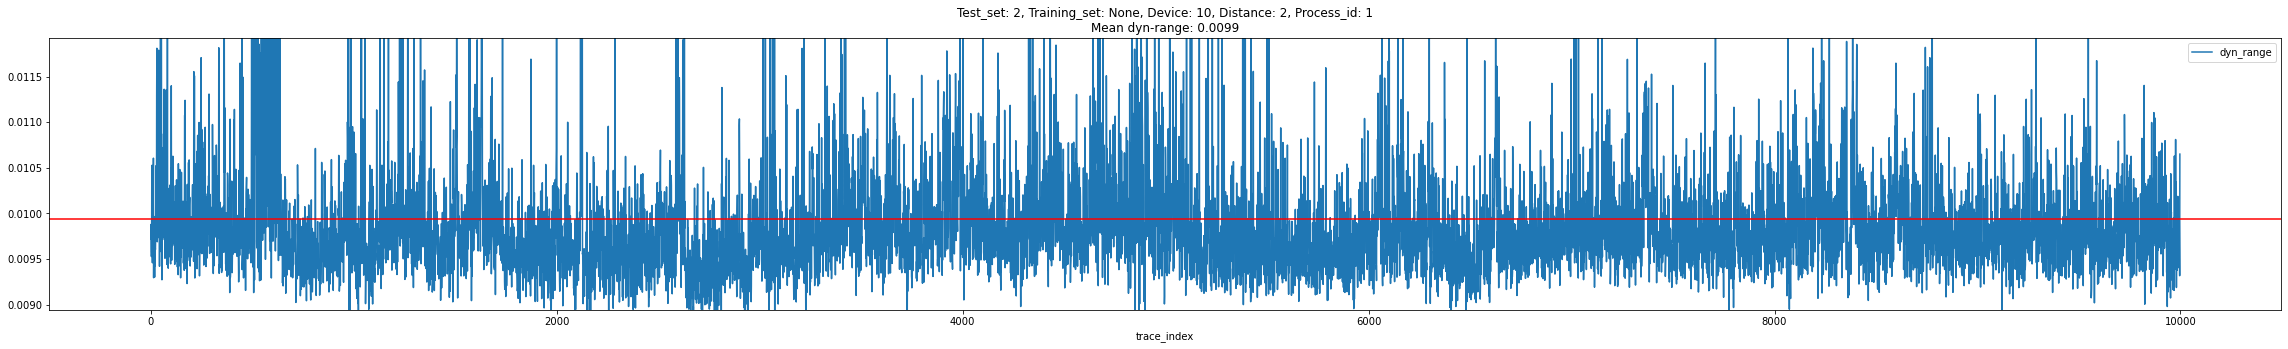

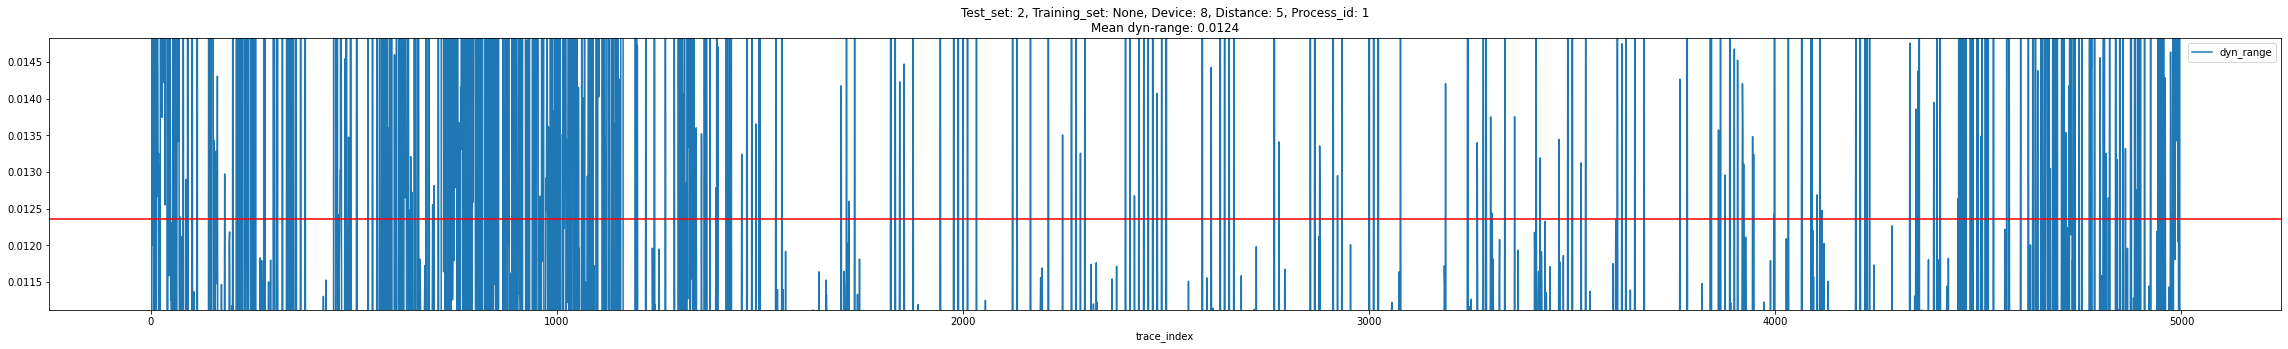

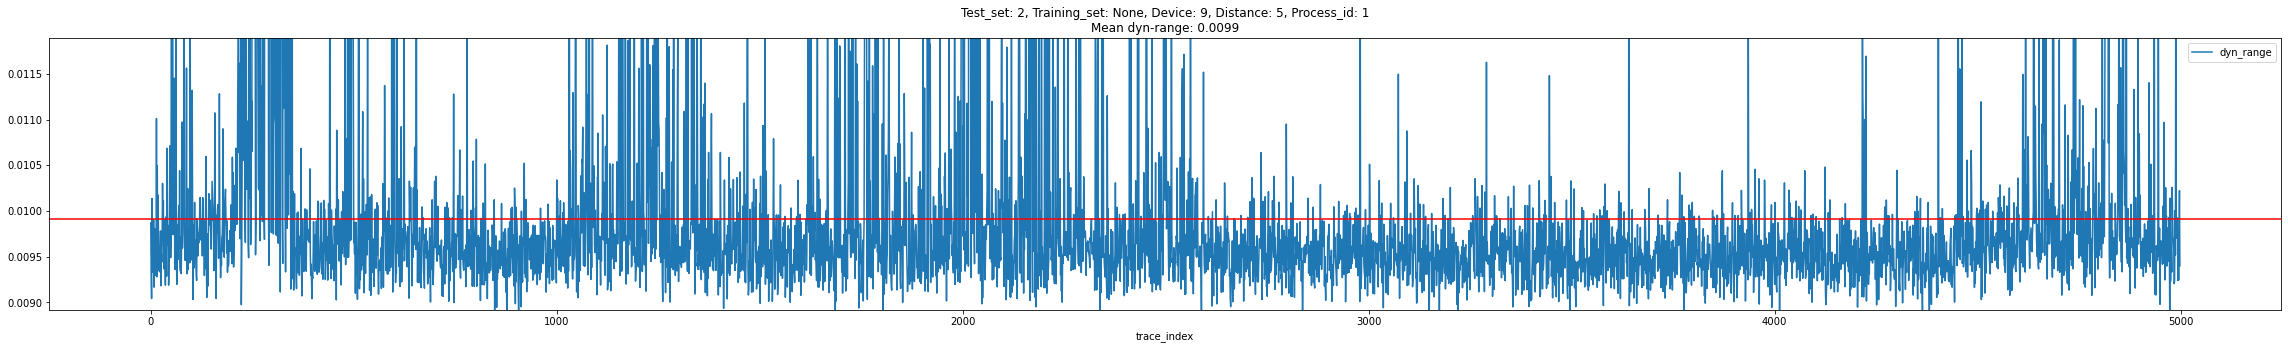

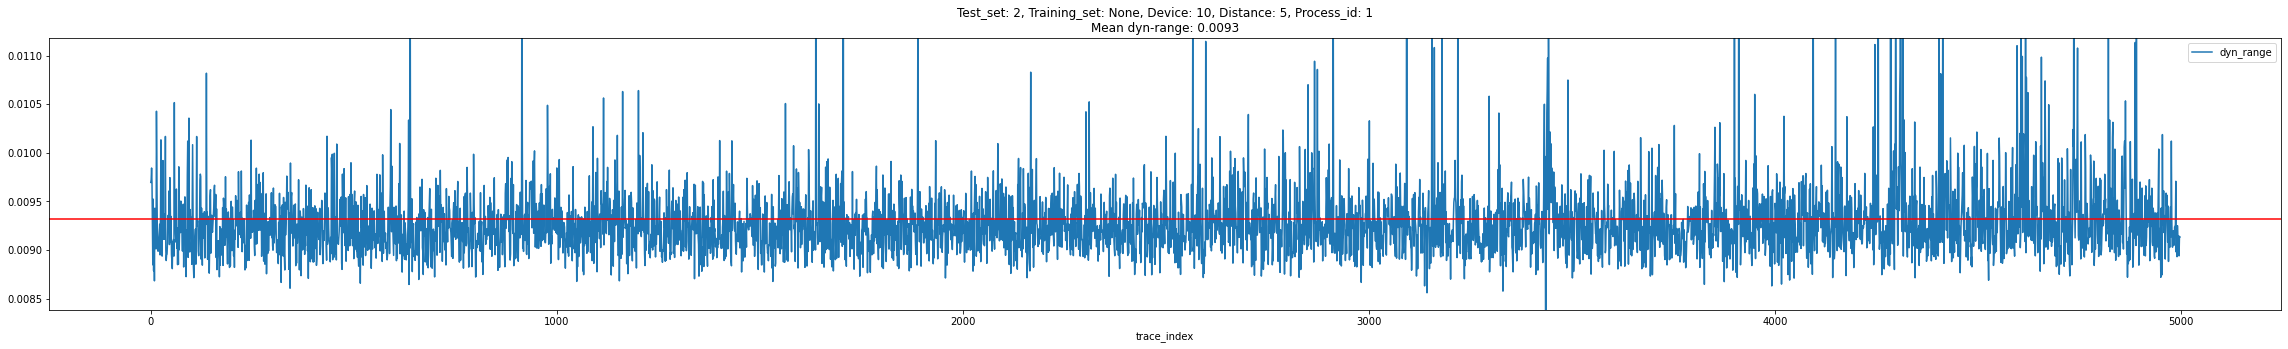

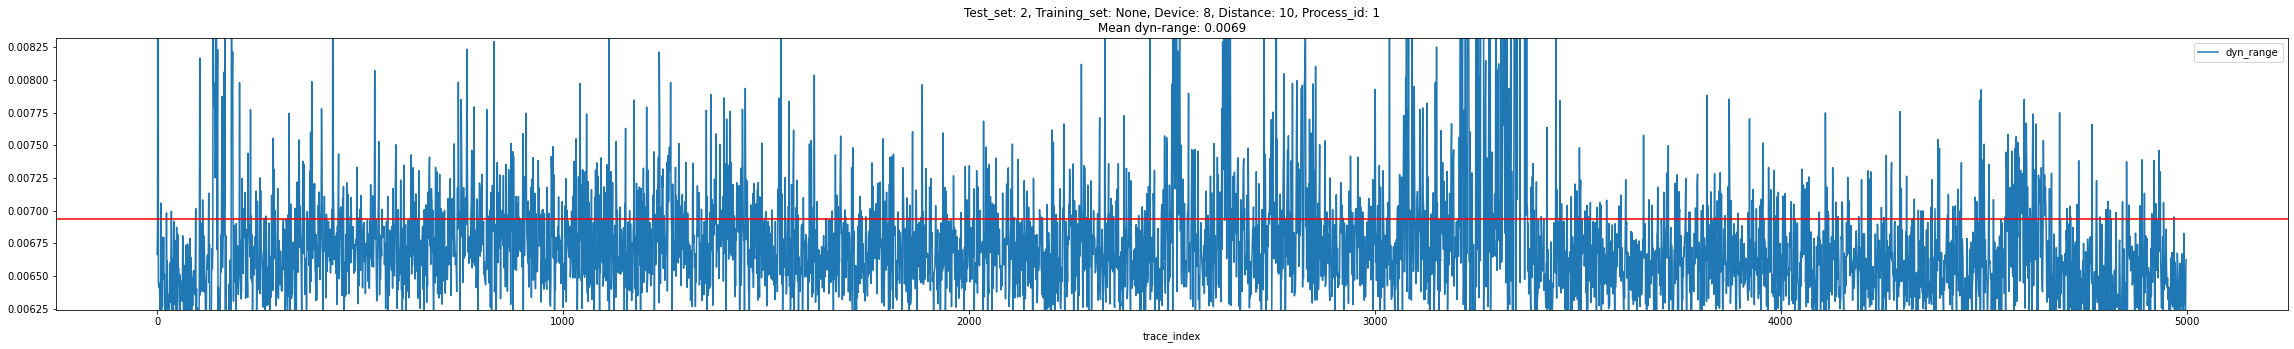

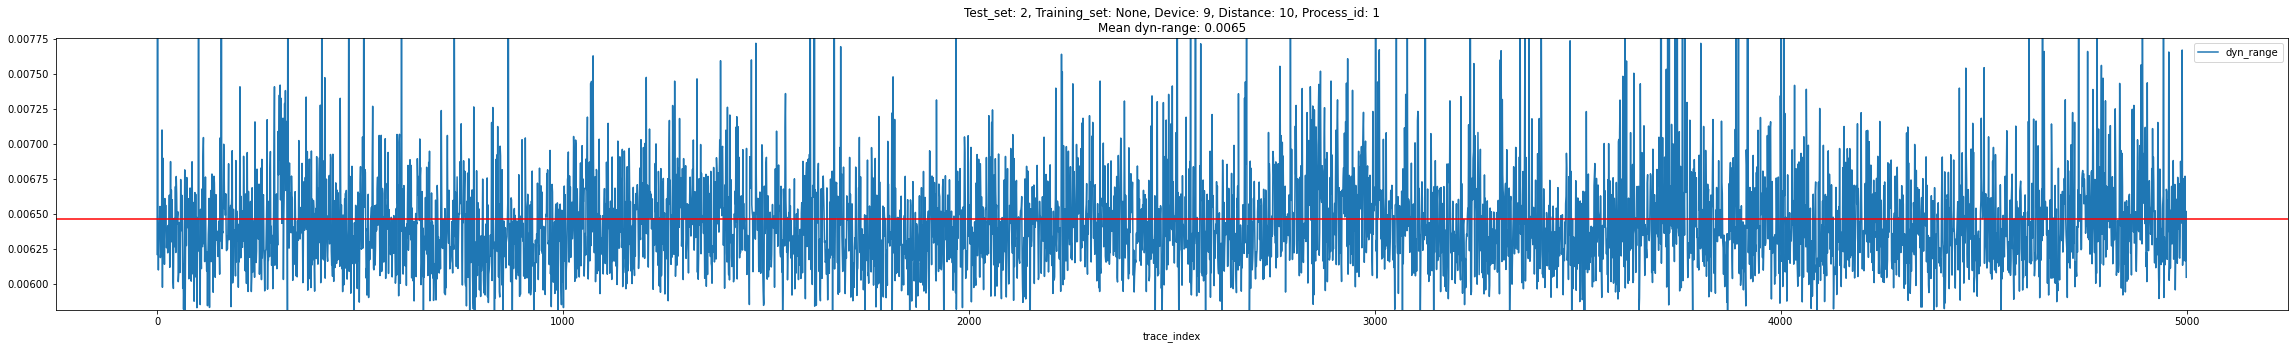

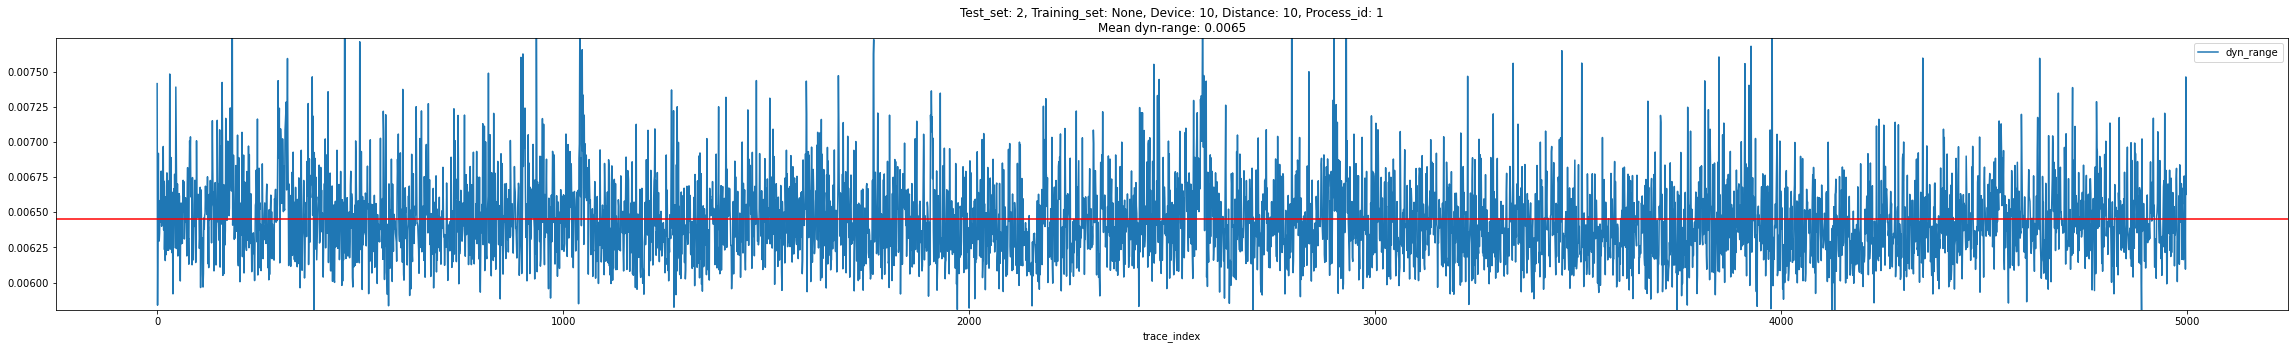

In [5]:
# Wang training set
test_set = "None"
training_set = 1
distance = "None"
devices = [1, 2, 3, 4, 5]
processes = [1]
for process in processes:
    for device in devices:
        plot_trace_width__dyn_range(test_set, training_set, distance, device, process)

# Wang training set
test_set = "None"
training_set = 1
distance = "None"
device = "None"
process = 3
plot_trace_width__dyn_range(test_set, training_set, distance, device, process)

# Wang test sets 15m, device 6-10
test_set = 1
training_set = "None"
distances = [15]
devices = [6, 7, 8, 9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__dyn_range(test_set, training_set, distance, device, process)

# Zedigh test_set, 2.5m, device 9-10
test_set = 2
training_set = "None"
distances = [2]
devices = [9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__dyn_range(test_set, training_set, distance, device, process)

# Zedigh test_set, 5-10m, device 9-10
test_set = 2
training_set = "None"
distances = [5, 10]
devices = [8, 9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__dyn_range(test_set, training_set, distance, device, process)

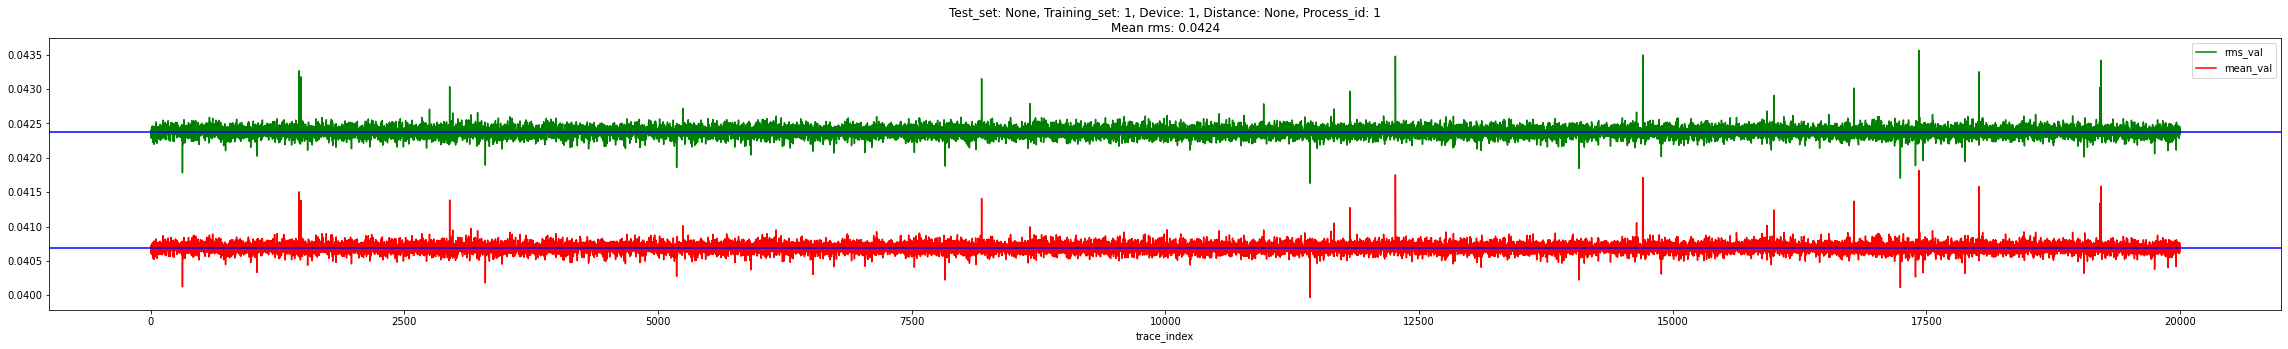

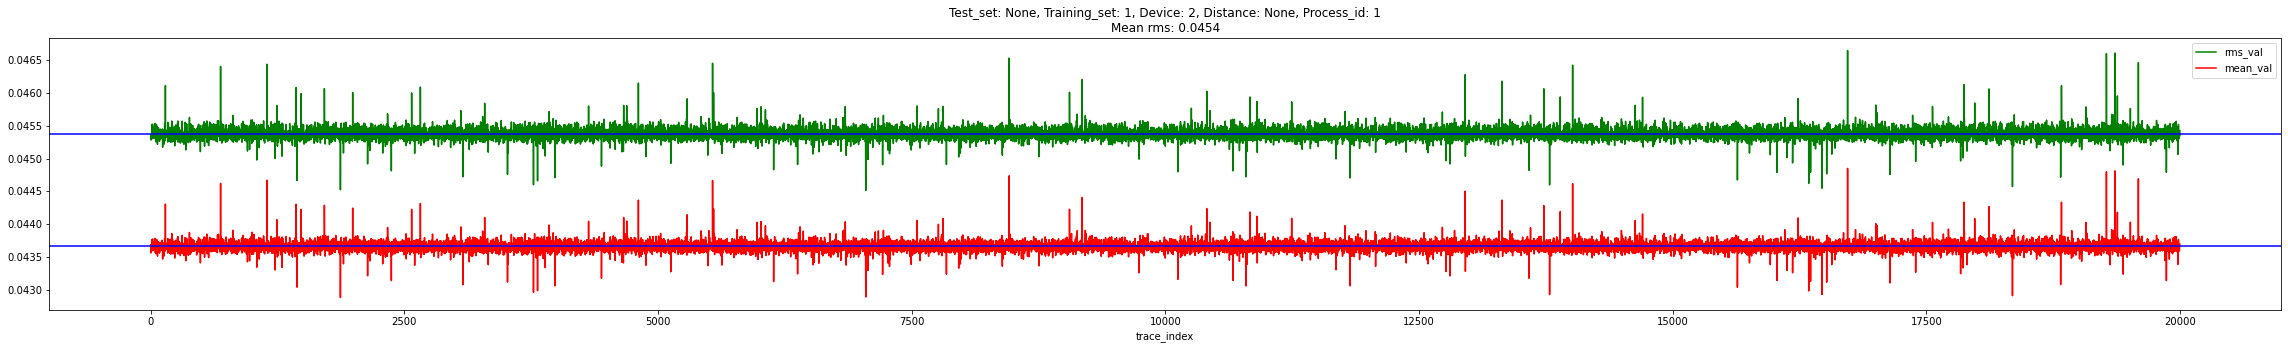

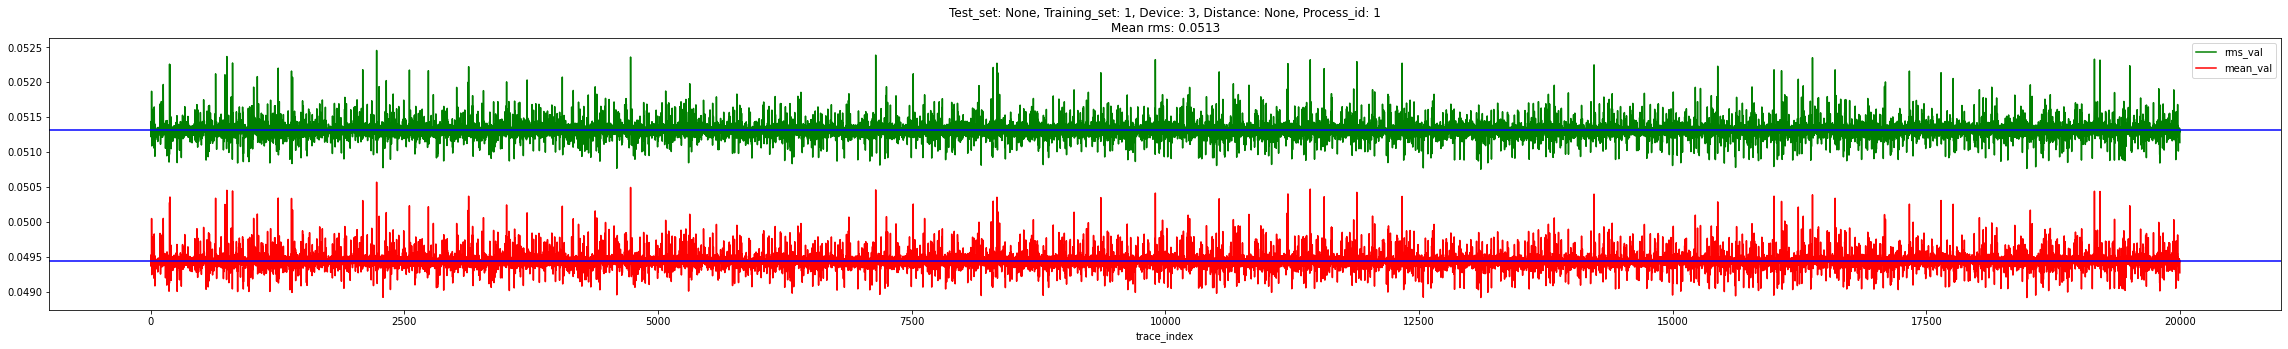

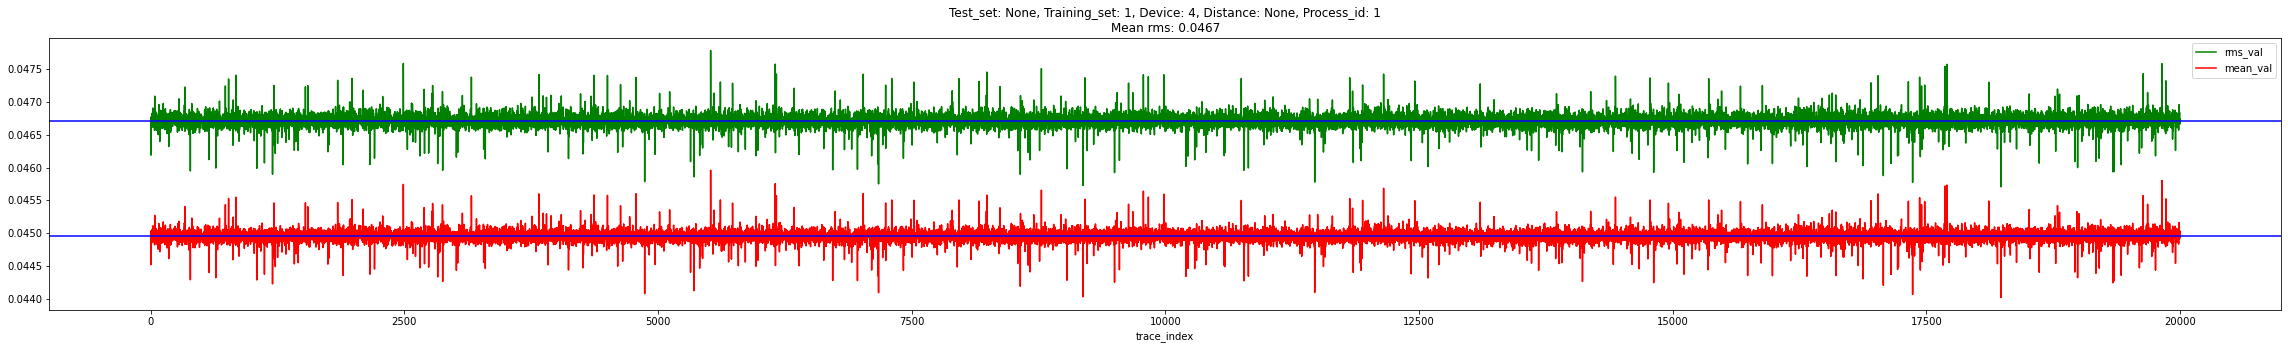

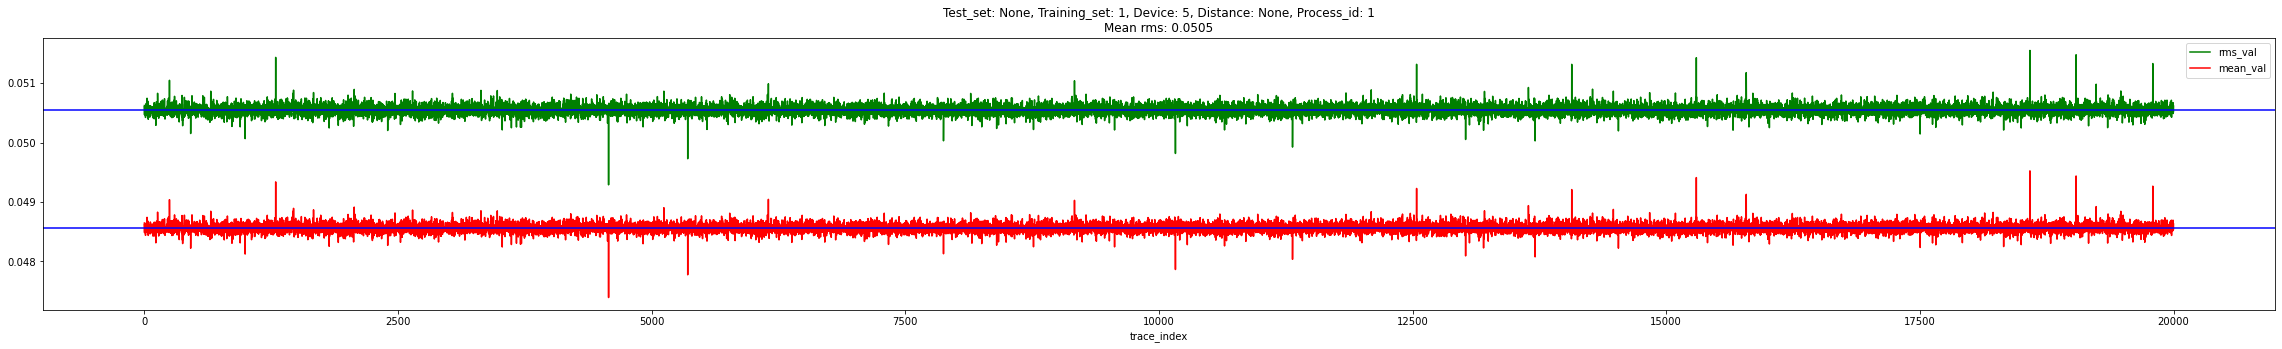

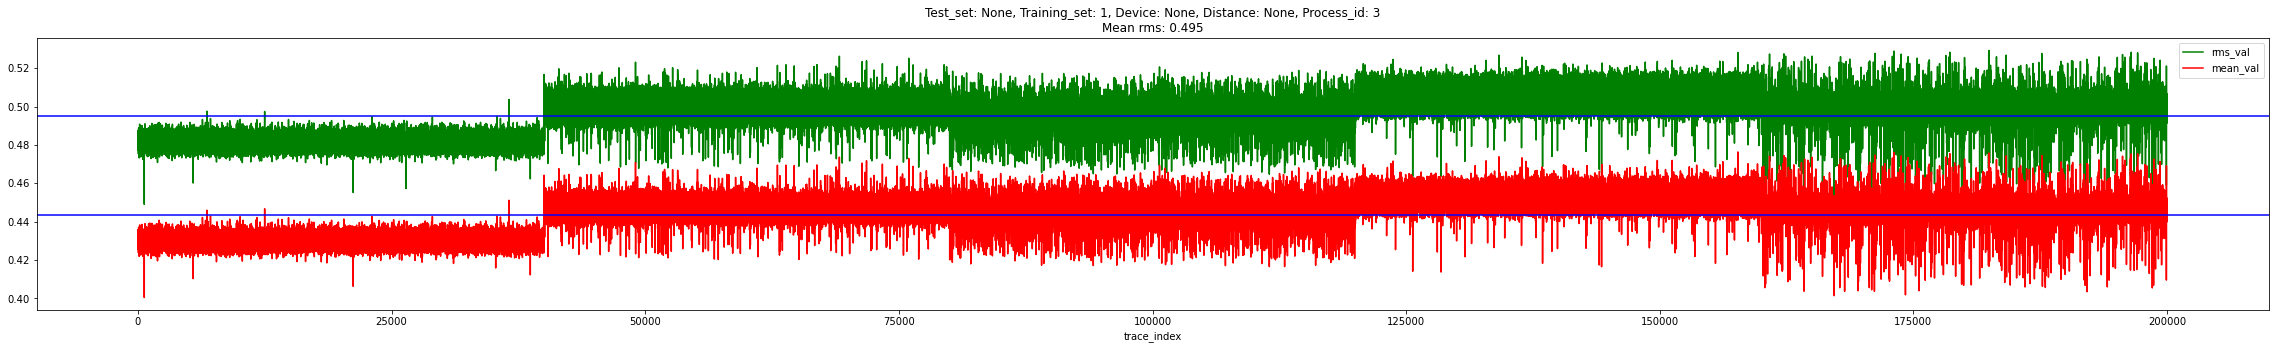

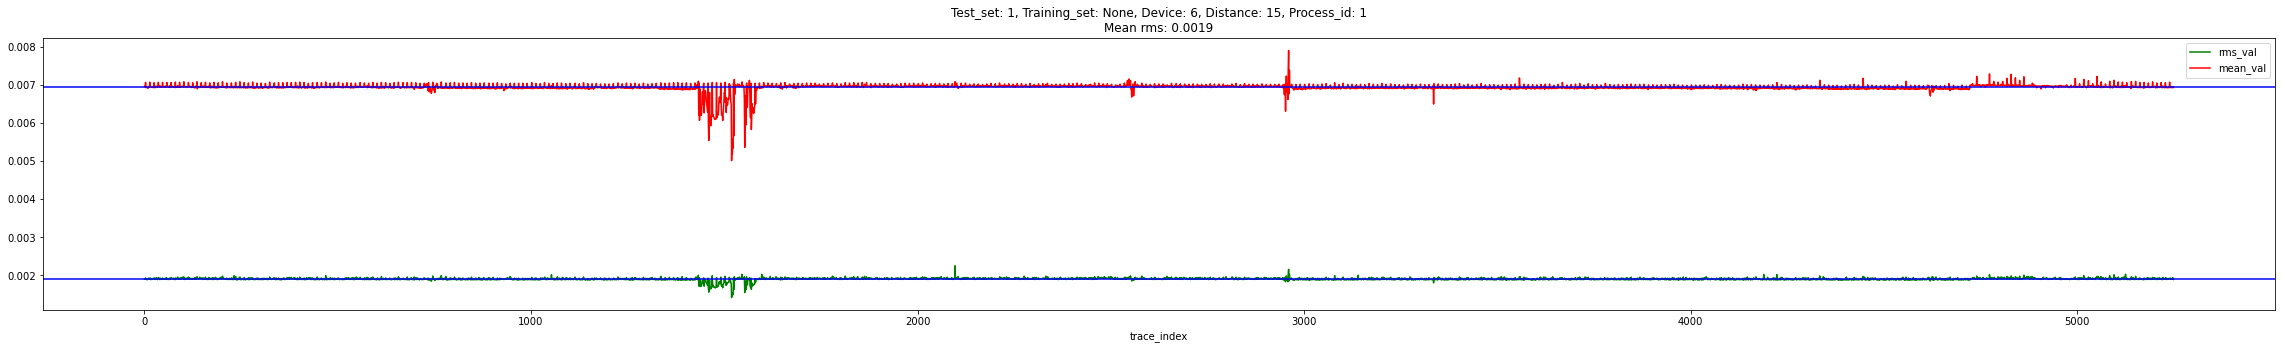

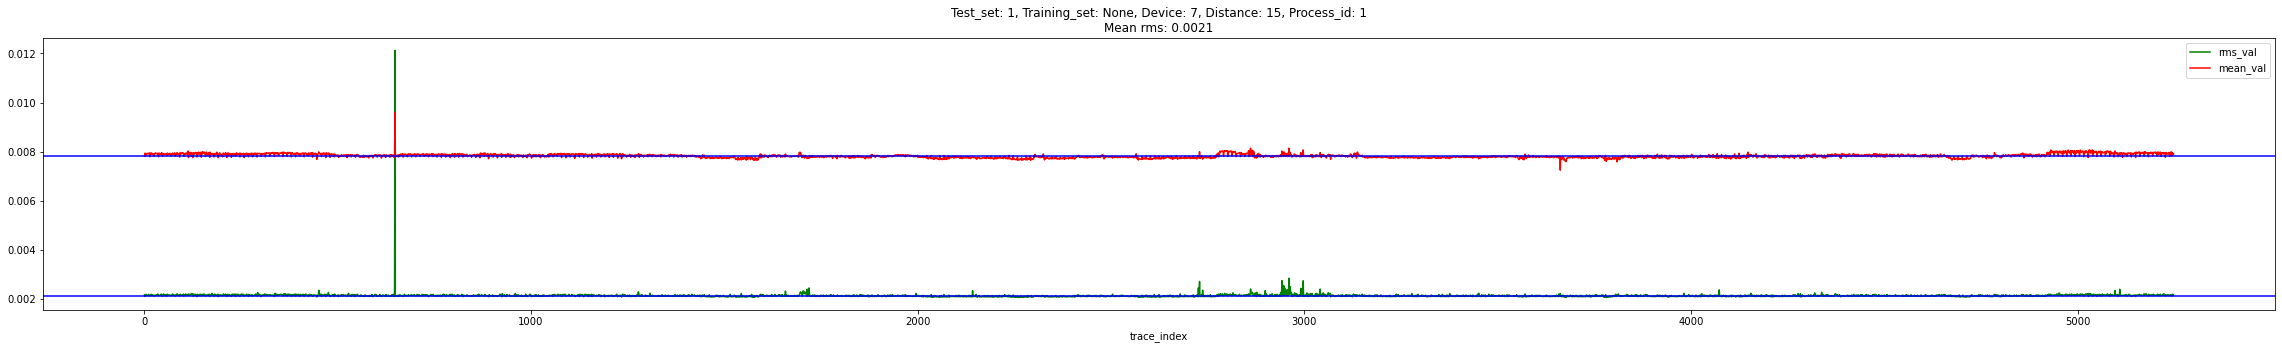

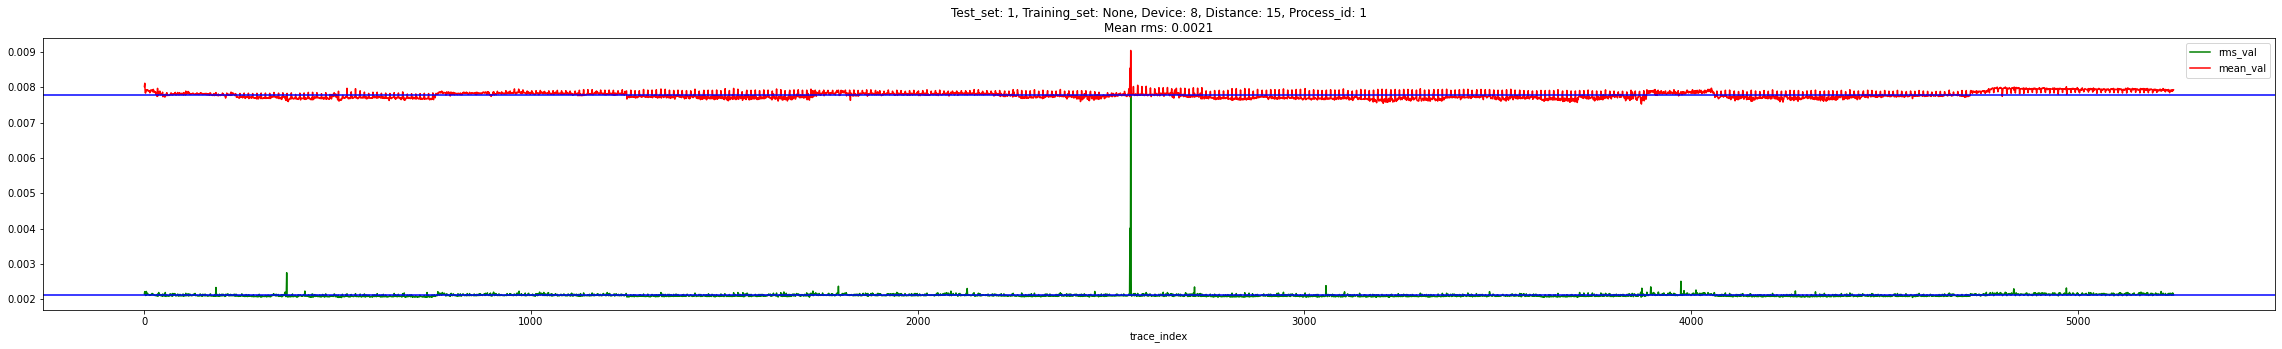

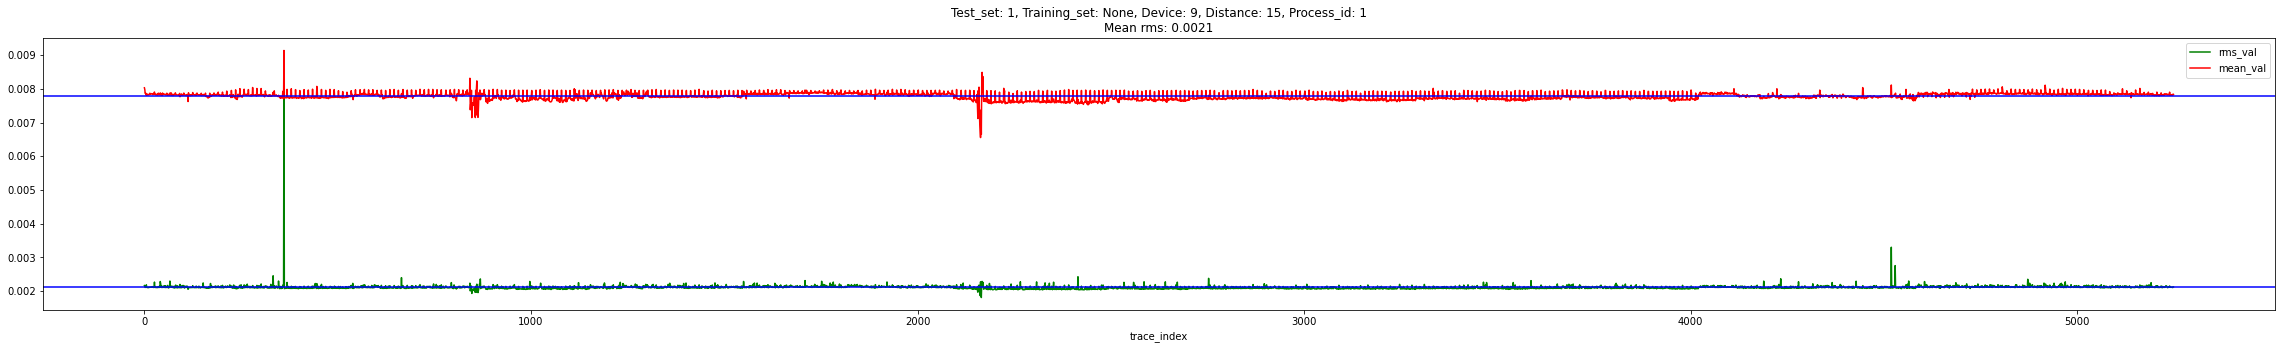

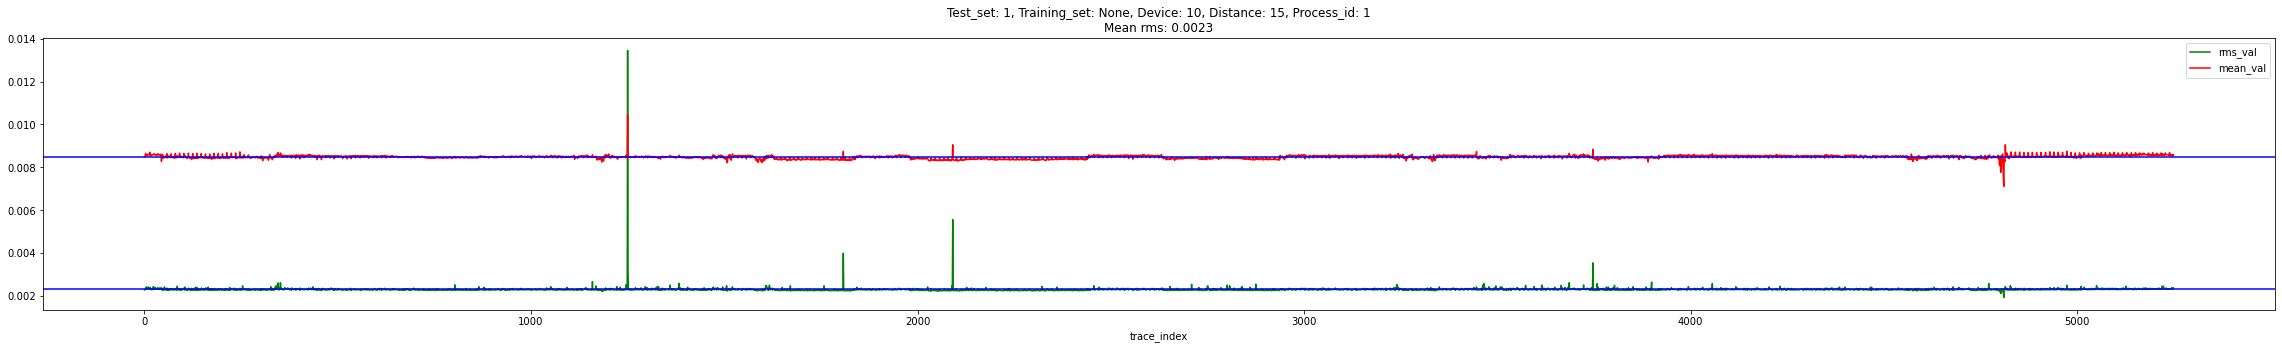

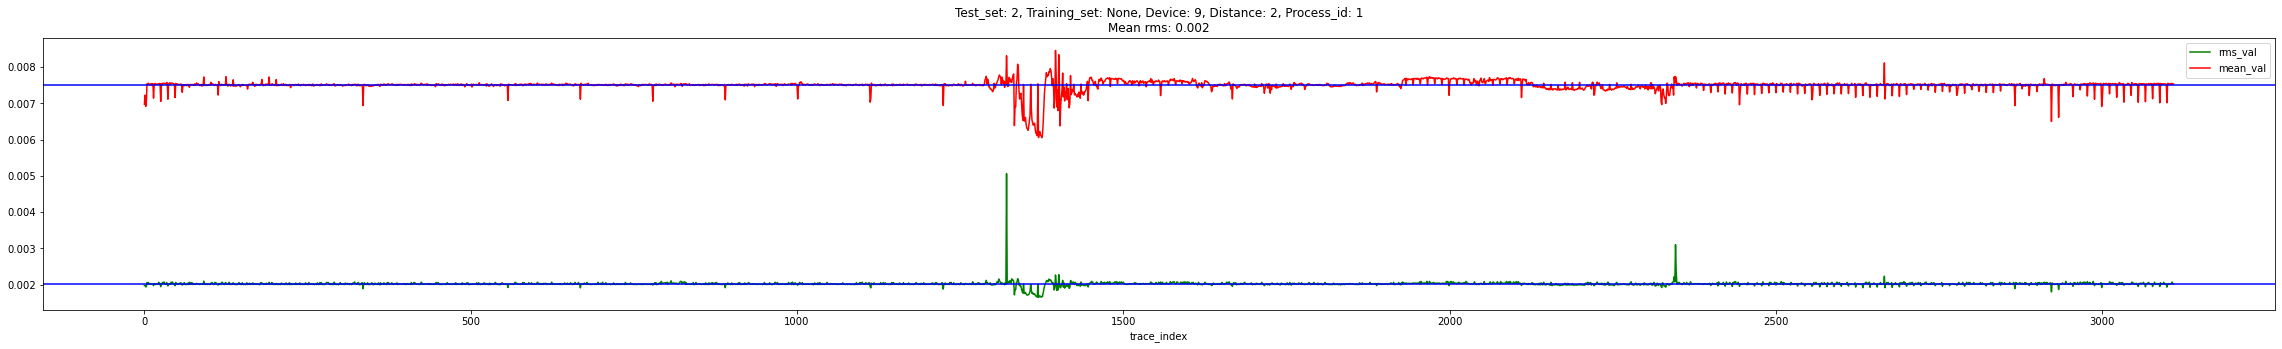

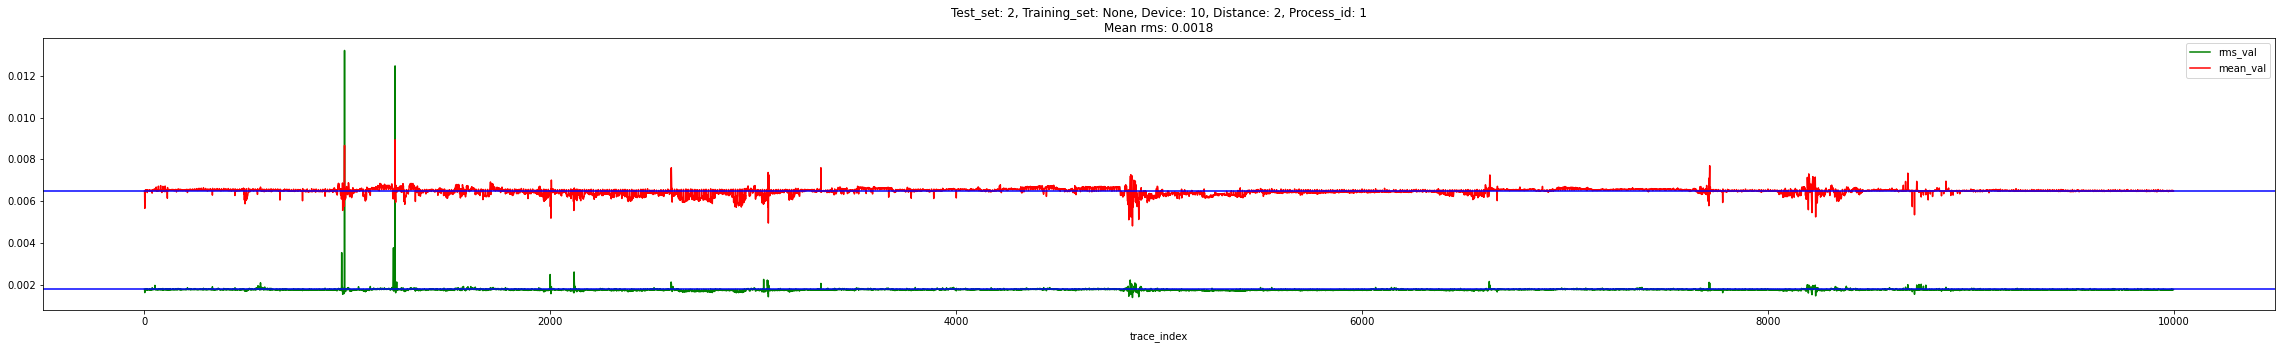

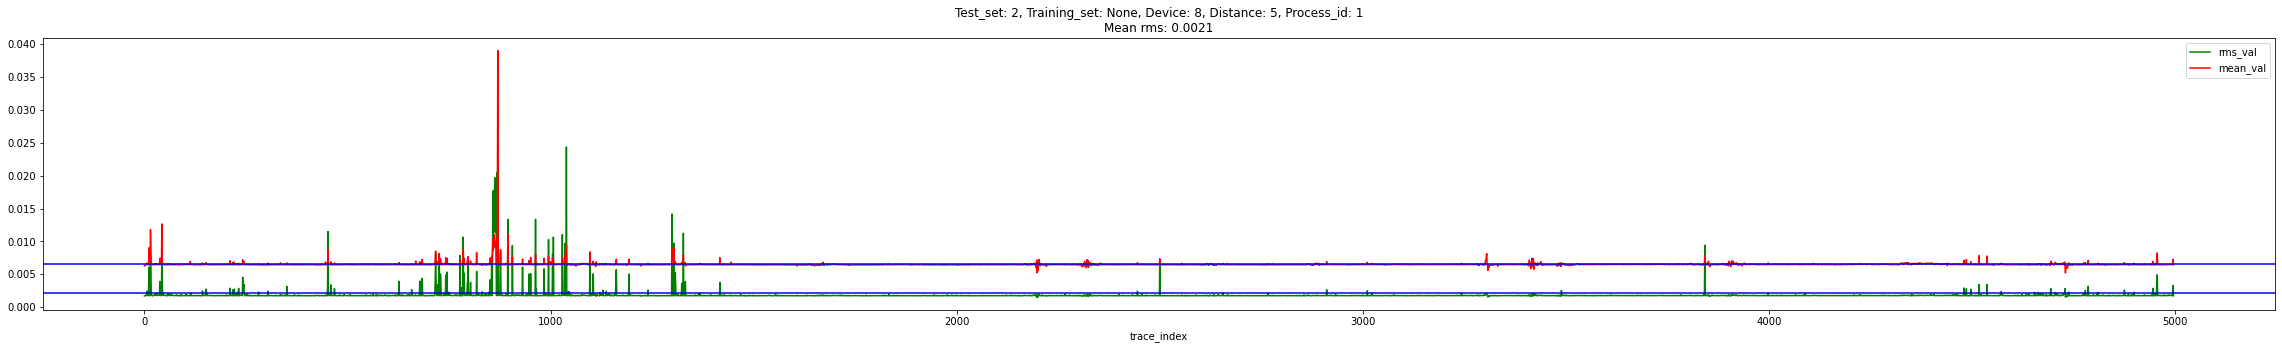

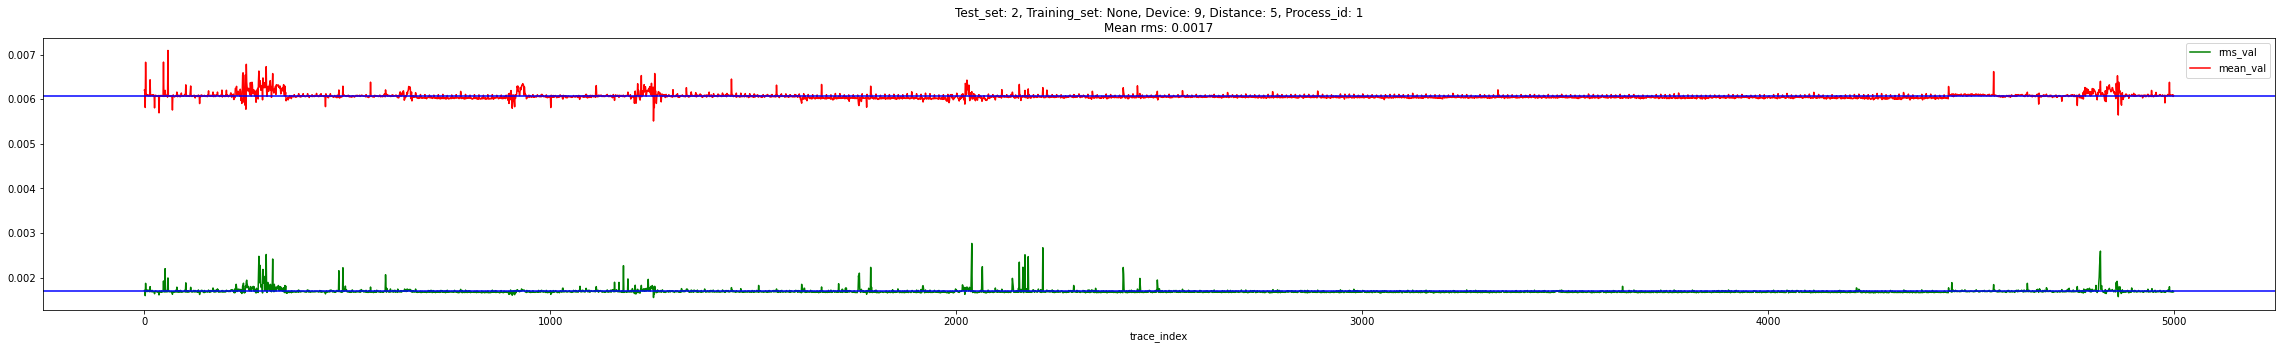

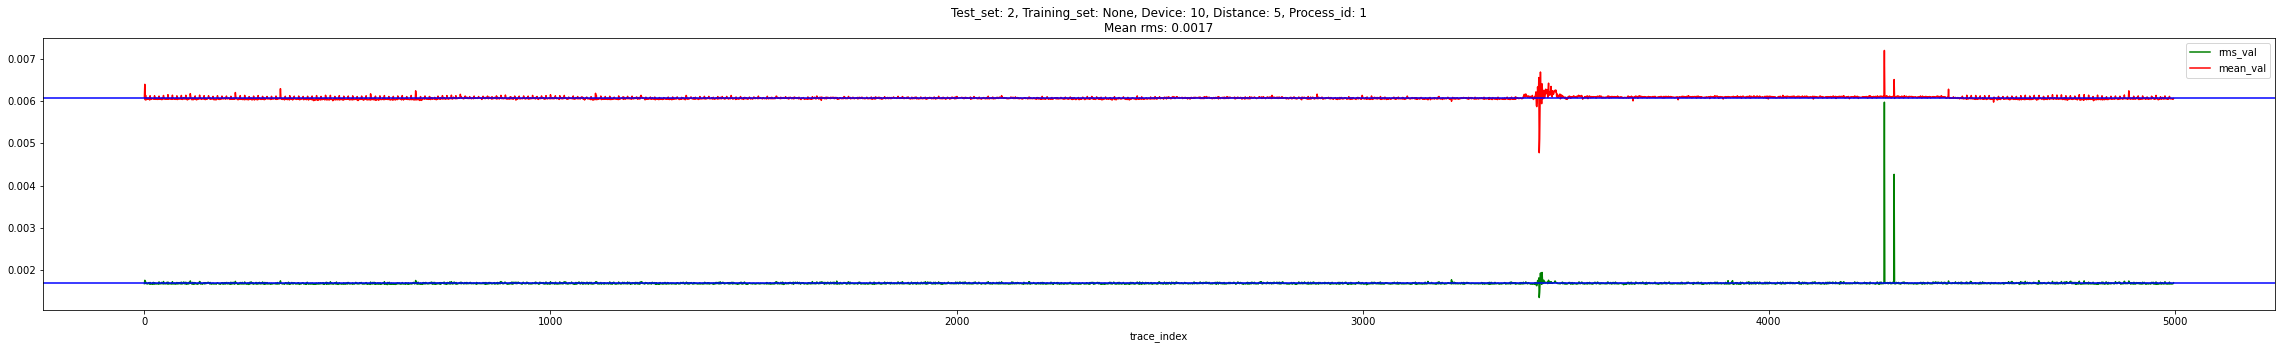

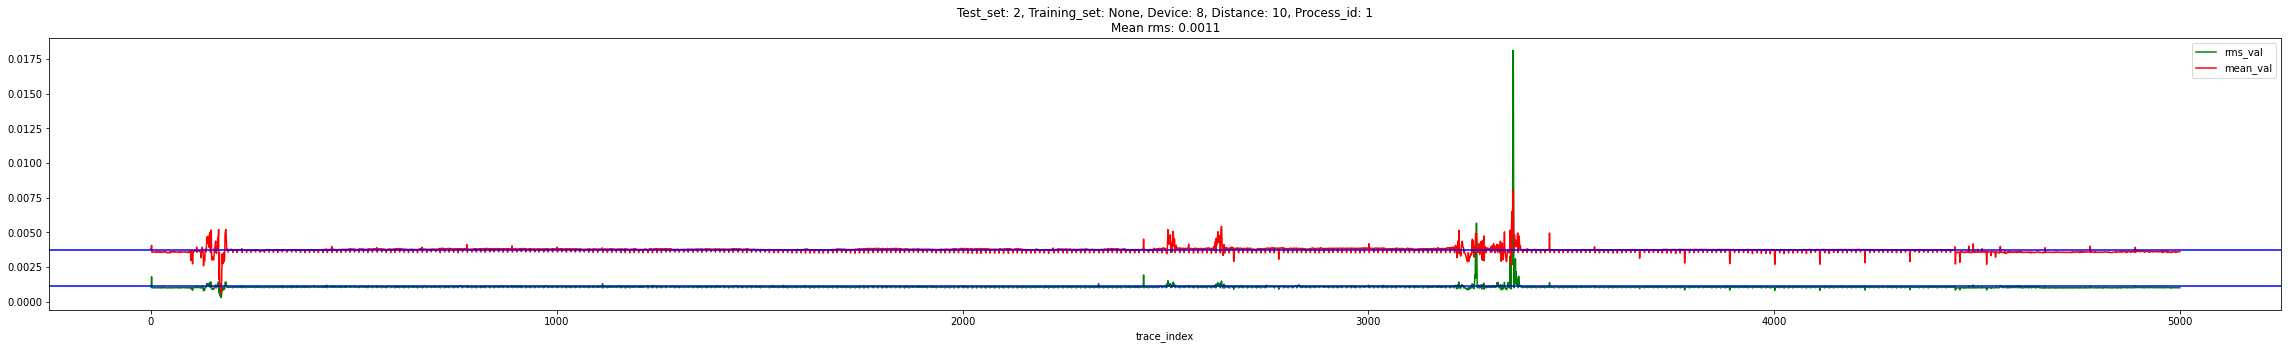

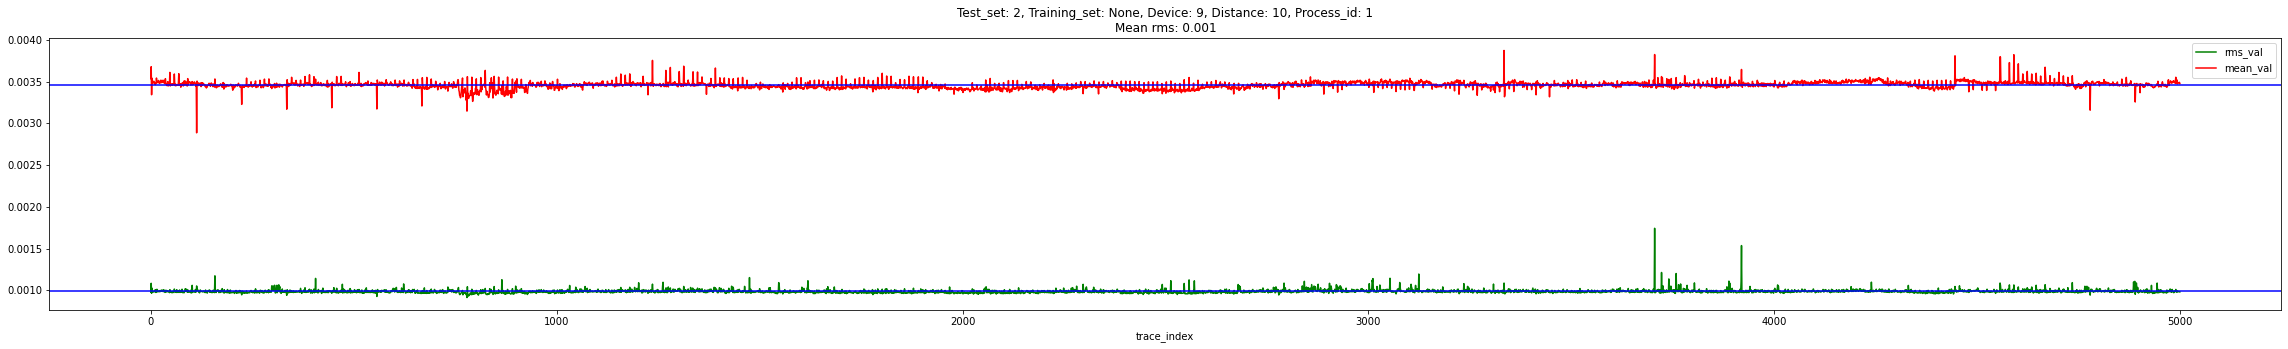

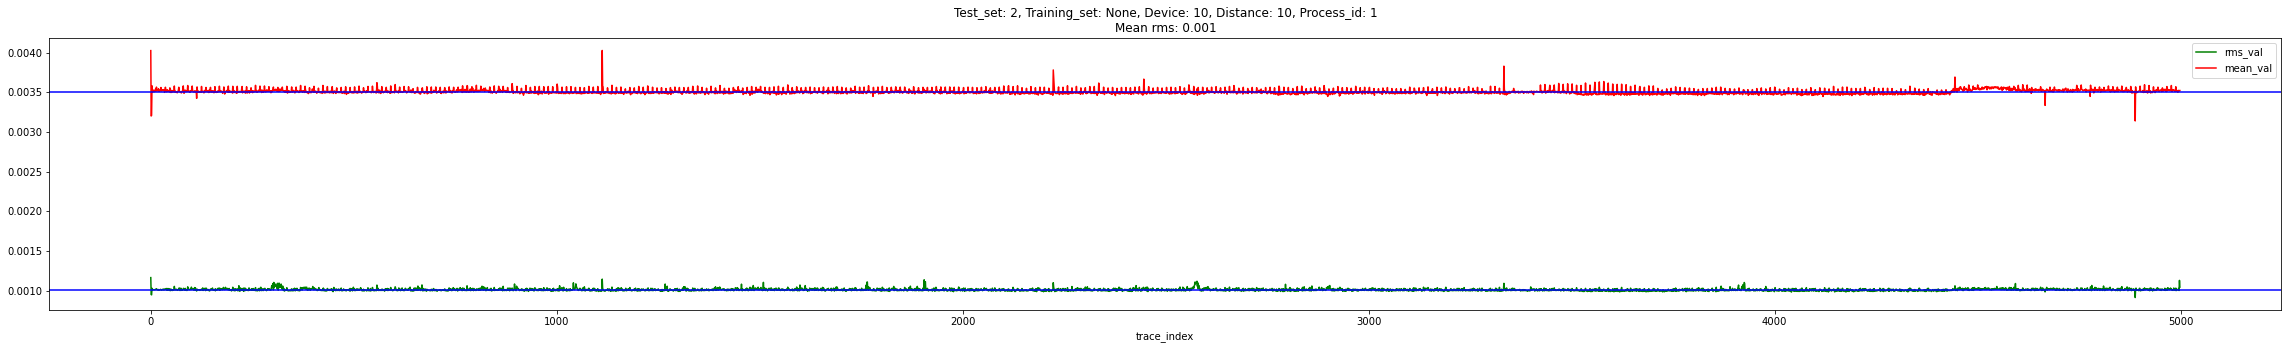

In [6]:
# Wang training set process 1
test_set = "None"
training_set = 1
distance = "None"
devices = [1, 2, 3, 4, 5]
processes = [1]
for process in processes:
    for device in devices:
        plot_trace_width__rms(test_set, training_set, distance, device, process)
        
# Wang training set process 3
# Wang training set
test_set = "None"
training_set = 1
distance = "None"
device = "None"
process = 3
plot_trace_width__rms(test_set, training_set, distance, device, process)

# Wang test sets 15m, device 6-10
test_set = 1
training_set = "None"
distances = [15]
devices = [6, 7, 8, 9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__rms(test_set, training_set, distance, device, process)

# Zedigh test_set, 2.5m, device 9-10
test_set = 2
training_set = "None"
distances = [2]
devices = [9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__rms(test_set, training_set, distance, device, process)

# Zedigh test_set, 5-10m, device 9-10
test_set = 2
training_set = "None"
distances = [5, 10]
devices = [8, 9, 10]
processes = [1] # [1, 3]
for distance in distances:
    for process in processes:
        for device in devices:
            plot_trace_width__rms(test_set, training_set, distance, device, process)